### 1. Import relevant libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Evaluate the performance of regression models.
from statsmodels.graphics.api import abline_plot # Plot a line given an intercept and slope.
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings # For handling error messages.
warnings.filterwarnings(action='ignore')

### 2. Load the data

In [2]:
# Define file paths for loading the data
train_data_path = 'train_data.csv'
test_data_path = 'test_data.csv'
train_target_path = 'train_target.csv'
test_target_path = 'test_target.csv'

# Load training and testing features from CSV files
X_train = pd.read_csv(train_data_path)
X_test = pd.read_csv(test_data_path)

# Load training and testing target variables from CSV files
y_train = pd.read_csv(train_target_path)['WQI']
y_test = pd.read_csv(test_target_path)['WQI'] 

In [3]:
# Display the summary information of the loaded data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cond (μS/cm)     820 non-null    float64
 1   DO (mg/L)        820 non-null    float64
 2   pH               820 non-null    float64
 3   NO2 (mg/L)       820 non-null    float64
 4   NO3 (mg/L)       820 non-null    float64
 5   TN (mg/L)        820 non-null    float64
 6   TP (mg/L)        820 non-null    float64
 7   TSS (mg/L)       820 non-null    float64
 8   BOD (mg/L)       820 non-null    float64
 9   Turbidity (NTU)  820 non-null    float64
dtypes: float64(10)
memory usage: 64.2 KB


In [4]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cond (μS/cm)     205 non-null    float64
 1   DO (mg/L)        205 non-null    float64
 2   pH               205 non-null    float64
 3   NO2 (mg/L)       205 non-null    float64
 4   NO3 (mg/L)       205 non-null    float64
 5   TN (mg/L)        205 non-null    float64
 6   TP (mg/L)        205 non-null    float64
 7   TSS (mg/L)       205 non-null    float64
 8   BOD (mg/L)       205 non-null    float64
 9   Turbidity (NTU)  205 non-null    float64
dtypes: float64(10)
memory usage: 16.1 KB


### 3. Modeling

Based on the information provided by info(), it seems that both the training and testing datasets have been loaded successfully without any missing values. Each dataset contains 10 columns, all of which are numerical (float64), including the target variable 'WQI'. There are 820 samples in the training set and 205 samples in the testing set, with 10 features each. 

Since the target variable, WQI, is continuous, linear regression, Random Forest Regression, and Support Vector Regression (SVR) models are used to explore different approaches and leverage the strengths of each method.

Linear Regression is a simple and interpretable model that works well when the relationship between the features and target variable is approximately linear.

Random Forest Regression is an ensemble learning method that combines multiple decision trees to make more accurate predictions. It can capture complex nonlinear relationships and handle large datasets with high dimensionality.

SVR is a powerful algorithm for regression tasks, particularly when dealing with data with complex relationships or high-dimensional feature spaces. It can capture nonlinear relationships by transforming the input features into a higher-dimensional space.

#### 3a. Making a Linear Regression Model: first model

In [5]:
# Instantiate the Linear Regression model
linear_model = LinearRegression()

In [6]:
# Fit the model to the training 
linear_model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict the target variable for the testing set
y_pred = linear_model.predict(X_test)

In [8]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Linear Regression Model Evaluation:
R-squared (R2) Score: 1.0
Mean Squared Error (MSE): 9.562533412069339e-28
Mean Absolute Error (MAE): 2.1567571576913284e-14


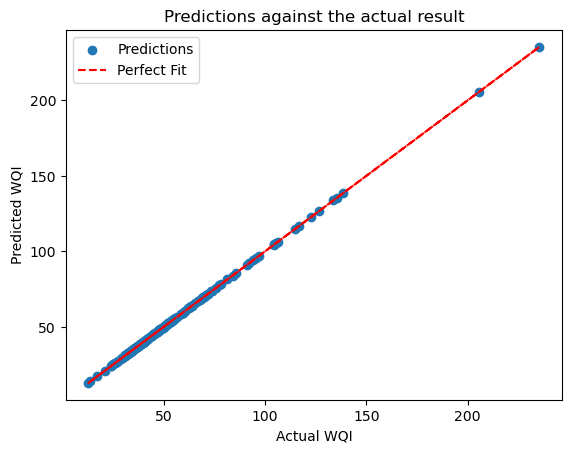

In [9]:
# Plot the predictions against the actual result
plt.scatter(y_test, y_pred, label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.title('Predictions against the actual result')
plt.legend()
plt.show()

#### 3b. Making a Random Forest Regression Methods: second model

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', bootstrap=True)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 31.794217062258923
Mean Absolute Error (MAE): 2.7184710255090487
R-squared (R2) Score: 0.9602564213223924


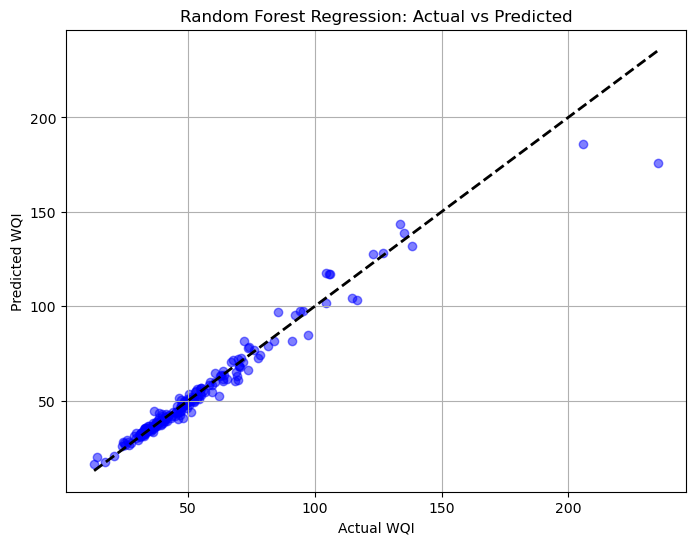

In [11]:
# Plot the predictions against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plot the diagonal line
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Best Model MSE on Testing Data:", mse_best)


Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Model MSE on Testing Data: 26.451587484311943


#### 3c. Making a XGBoost Regression Model: third model

In [13]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
import xgboost as xgb

# Define the XGBoost regressor model
xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regression Mean Squared Error (MSE):", mse_xgb)

XGBoost Regression Mean Squared Error (MSE): 17.552052512135944


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for Grid Search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300]
}

# Define the XGBoost regressor model
xgb_model = xgb.XGBRegressor()

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.7}
Best Score (MSE): -29.885946503491464


### 4. Model Evaluation

### 5. Final Model